/var/folders/l5/_l4xmm952vg1kky2515nl54r0000gn/T/ipykernel_28404/145932754.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['direction'] = df['direction'].replace(0, pd.NA).ffill().fillna(0)


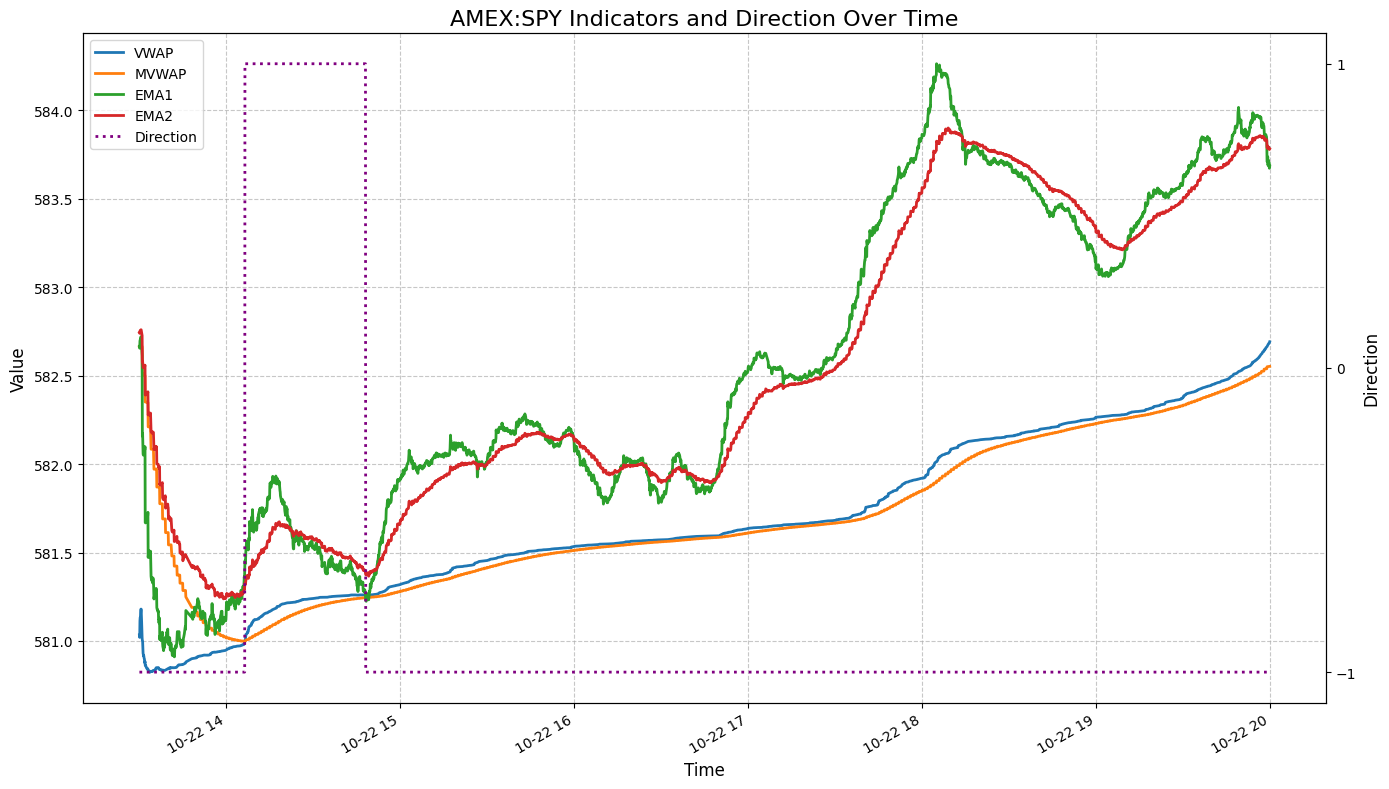

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define column names
columns = ['now', 'candle_timestamp', 'mvwap', 'vwap', 'long_entry', 'short_entry', 'ema1', 'ema2']

# Load the CSV file
df = pd.read_csv('../output/2024-10-22-AMEX:SPY-regular-1-indicator.csv', header=None, names=columns)

# Convert 'now' column to datetime
df['now'] = pd.to_datetime(df['now'], unit='s')

# Trim records before market open (9:30 AM ET) and after market close (4:00 PM ET)
df['now_et'] = df['now'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
market_open = df['now_et'].dt.normalize() + pd.Timedelta(hours=9, minutes=30)
market_close = df['now_et'].dt.normalize() + pd.Timedelta(hours=16)
df = df[(df['now_et'] >= market_open) & (df['now_et'] <= market_close)]
df = df.drop(columns=['now_et'])

# Combine long and short entries
df['direction'] = df['long_entry'] - df['short_entry']

# Forward fill the entry values
df['direction'] = df['direction'].replace(0, pd.NA).ffill().fillna(0)

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot continuous variables on the primary axis
ax1.plot(df['now'], df['vwap'], label='VWAP', linewidth=2)
ax1.plot(df['now'], df['mvwap'], label='MVWAP', linewidth=2)
ax1.plot(df['now'], df['ema1'], label='EMA1', linewidth=2)
ax1.plot(df['now'], df['ema2'], label='EMA2', linewidth=2)

ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.tick_params(axis='y')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot entry signals on the secondary axis
ax2.plot(df['now'], df['direction'], label='Direction', color='purple', linestyle=':', linewidth=2)

ax2.set_ylabel('Direction', fontsize=12)
ax2.tick_params(axis='y')
ax2.set_ylim(-1.1, 1.1)  # Set y-axis limits for entry data
ax2.set_yticks([-1, 0, 1])  # Set specific ticks for clarity

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.title('AMEX:SPY Indicators and Direction Over Time', fontsize=16)

# Improve x-axis readability
plt.gcf().autofmt_xdate()  # Rotation and alignment of tick labels

# Add grid for better readability
ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()